# New Section

In [1]:
  from google.colab import drive
  drive.mount('/content/drive')

Mounted at /content/drive


# New Section

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications.vgg16 import VGG16
from keras.applications import imagenet_utils
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD
from keras.optimizers import RMSprop
	
from tensorflow.keras import layers, Model, Input

from keras.layers.core import Dense
from keras.layers.core import Dropout
from keras.layers.core import Flatten
from tqdm import tqdm
import cv2
import numpy as np
import random
import os
from random import shuffle 

In [3]:
import zipfile as zp
os.makedirs('content/data', exist_ok=True)


In [4]:
train_dir = '/content/data/train'
test_dir = '/content/data/test'
IMG_Size = 128

train_zip = zp.ZipFile('/content/drive/MyDrive/Google_Colab/train.zip')
train_zip.extractall('/content/data')
test_zip = zp.ZipFile('/content/drive/MyDrive/Google_Colab/test.zip')
test_zip.extractall('/content/data')

# New Section

In [5]:
from tqdm import tqdm
import cv2

In [6]:
image_path_train = list(os.listdir(train_dir))
random.shuffle(image_path_train)

In [7]:
def label_img(img):
  word_label = img.split('.')[-3]
  if word_label == 'cat': return 0
  elif word_label == 'dog': return 1


In [8]:
def Get_data_labels(image_path):
  list_image = []
  labels = []
  for imagePath in tqdm(image_path):
      path = os.path.join(train_dir,imagePath)
      image = cv2.imread(path)
      image = cv2.resize(image, (IMG_Size,IMG_Size))
      image = np.array(image)
      image = np.expand_dims(image, 0)
      image = imagenet_utils.preprocess_input(image)
      list_image.append(image)
      labels.append(label_img(imagePath))
      
  list_image = np.vstack(list_image)
  labels = np.vstack(labels)
  return (list_image, labels)


In [9]:
list_image, labels = Get_data_labels(image_path_train)
X_train, y_train = list_image[:20000], labels[:20000]
X_test, y_test = list_image[20000:25000], labels[20000:25000]

100%|██████████| 25000/25000 [00:56<00:00, 441.26it/s]


In [13]:
from tensorflow import keras
from tensorflow.keras import layers
# these are a new feature in TF 2.2
from tensorflow.keras.layers.experimental import preprocessing

model = keras.Sequential([
                          
    layers.ZeroPadding2D(padding = (3,3), input_shape = (128,128,3)),
    layers.Conv2D(filters = 16 , kernel_size = (7,7), strides = (1,1)),
    layers.BatchNormalization(axis =3),
    layers.ReLU(),
    layers.MaxPooling2D(pool_size = (2,2)),

    layers.ZeroPadding2D(padding = (3,3)),
    layers.Conv2D(filters = 32 , kernel_size = (7,7), strides = (1,1)),
    layers.BatchNormalization(axis =3),
    layers.ReLU(),
    layers.MaxPooling2D(pool_size = (2,2)),

    layers.ZeroPadding2D(padding = (3,3)),
    layers.Conv2D(filters = 64 , kernel_size = (7,7), strides = (1,1)),
    layers.BatchNormalization(axis =3),
    layers.ReLU(),
    layers.MaxPooling2D(pool_size = (2,2)),

    layers.ZeroPadding2D(padding = (3,3)),
    layers.Conv2D(filters = 128 , kernel_size = (7,7), strides = (1,1)),
    layers.BatchNormalization(axis =3),
    layers.ReLU(),
    layers.MaxPooling2D(pool_size = (2,2)),

    layers.ZeroPadding2D(padding = (3,3)),
    layers.Conv2D(filters = 128 , kernel_size = (7,7), strides = (1,1)),
    layers.BatchNormalization(axis =3),
    layers.ReLU(),
    layers.MaxPooling2D(pool_size = (2,2)),


    layers.Flatten(),
    layers.Dense(256, activation = 'relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid'),
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_5 (ZeroPaddin (None, 134, 134, 3)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 128, 128, 16)      2368      
_________________________________________________________________
batch_normalization_5 (Batch (None, 128, 128, 16)      64        
_________________________________________________________________
re_lu_5 (ReLU)               (None, 128, 128, 16)      0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 64, 64, 16)        0         
_________________________________________________________________
zero_padding2d_6 (ZeroPaddin (None, 70, 70, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 64, 64, 32)       

In [14]:
# augmentation cho training data
aug_train = ImageDataGenerator(rescale=1./255, rotation_range=30, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.2, 
                         zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')
# augementation cho test
aug_test= ImageDataGenerator(rescale=1./255)

In [15]:
opt = RMSprop(0.001)
#opt = 'adam'
model.compile(opt, 'binary_crossentropy', ['binary_accuracy'])
numOfEpoch = 25
H = model.fit_generator(aug_train.flow(X_train, y_train, batch_size=64), 
                        steps_per_epoch=len(X_train)/128,
                        validation_data=(aug_test.flow(X_test, y_test, batch_size=64)),
                        validation_steps=len(X_test)/128,
                        epochs=numOfEpoch)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
156/156 [==============================] - 68s 225ms/step - loss: 0.8283 - binary_accuracy: 0.5561 - val_loss: 1.9200 - val_binary_accuracy: 0.5074
Epoch 2/25
156/156 [==============================] - 35s 222ms/step - loss: 0.6593 - binary_accuracy: 0.6103 - val_loss: 1.4214 - val_binary_accuracy: 0.5004
Epoch 3/25
156/156 [==============================] - 35s 224ms/step - loss: 0.6163 - binary_accuracy: 0.6579 - val_loss: 0.6161 - val_binary_accuracy: 0.6617
Epoch 4/25
156/156 [==============================] - 35s 223ms/step - loss: 0.5764 - binary_accuracy: 0.6959 - val_loss: 0.5902 - val_binary_accuracy: 0.6676
Epoch 5/25
156/156 [==============================] - 35s 224ms/step - loss: 0.5479 - binary_accuracy: 0.7167 - val_loss: 0.4842 - val_binary_accuracy: 0.7578
Epoch 6/25
156/156 [==============================] - 35s 222ms/step - loss: 0.5163 - binary_accuracy: 0.7456 - val_loss: 0.5332 - val_binary_accuracy: 0.7297
Epoch 7/25
156/156 [==========================

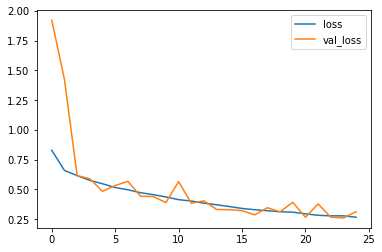

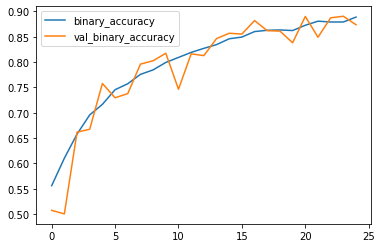

In [16]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
import pandas as pd
history_frame = pd.DataFrame(H.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot();